# Setup

## Instalação das bibliotecas

In [1]:
# Instalação das bibliotecas pandas, numpy, matplotlib, seaborn
%pip install pandas numpy matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


## Documentação dos arquivos

Documentação do que se trata os arquivos (contexto) e seus dados (colunas)

https://aqs.epa.gov/aqsweb/airdata/FileFormats.html#_daily_summary_files

## Criação da estrtutura de diretorios

In [2]:
# Cria a pasta data caso não exista
import os

if not os.path.exists('data'):
    os.makedirs('data')

## Download dos arquivos

Identificação do padrão para download dos arquivos.

- Ozone (44201) - https://aqs.epa.gov/aqsweb/airdata/daily_44201_{ANO}.zip
- SO2 (42401) - https://aqs.epa.gov/aqsweb/airdata/daily_42401_{ANO}.zip
- CO (42101) - https://aqs.epa.gov/aqsweb/airdata/daily_42101_{ANO}.zip
- NO2 (42602) - https://aqs.epa.gov/aqsweb/airdata/daily_42602_{ANO}.zip

Exemplo: https://aqs.epa.gov/aqsweb/airdata/daily_44201_2024.zip

In [3]:
urls_files = []

urlozone_base = 'https://aqs.epa.gov/aqsweb/airdata/daily_44201_{year}.zip',
urlso2_base = 'https://aqs.epa.gov/aqsweb/airdata/daily_42401_{year}.zip',
urlco_base = 'https://aqs.epa.gov/aqsweb/airdata/daily_42101_{year}.zip',
urlno2_base = 'https://aqs.epa.gov/aqsweb/airdata/daily_42602_{year}.zip',

ano_inicio = 2022
ano_fim = 2024

for ano in range(ano_inicio, ano_fim+1):
    urls_files.append(urlozone_base[0].format(year=ano))
    urls_files.append(urlso2_base[0].format(year=ano))
    urls_files.append(urlco_base[0].format(year=ano))
    urls_files.append(urlno2_base[0].format(year=ano))

urls_files


['https://aqs.epa.gov/aqsweb/airdata/daily_44201_2022.zip',
 'https://aqs.epa.gov/aqsweb/airdata/daily_42401_2022.zip',
 'https://aqs.epa.gov/aqsweb/airdata/daily_42101_2022.zip',
 'https://aqs.epa.gov/aqsweb/airdata/daily_42602_2022.zip',
 'https://aqs.epa.gov/aqsweb/airdata/daily_44201_2023.zip',
 'https://aqs.epa.gov/aqsweb/airdata/daily_42401_2023.zip',
 'https://aqs.epa.gov/aqsweb/airdata/daily_42101_2023.zip',
 'https://aqs.epa.gov/aqsweb/airdata/daily_42602_2023.zip',
 'https://aqs.epa.gov/aqsweb/airdata/daily_44201_2024.zip',
 'https://aqs.epa.gov/aqsweb/airdata/daily_42401_2024.zip',
 'https://aqs.epa.gov/aqsweb/airdata/daily_42101_2024.zip',
 'https://aqs.epa.gov/aqsweb/airdata/daily_42602_2024.zip']

In [4]:
import urllib.request
import shutil

total_size = 0

for url in urls_files:
    # Faz uma requisição HEAD para obter os cabeçalhos
    with urllib.request.urlopen(urllib.request.Request(url, method='HEAD')) as response:
        total_size += int(response.headers.get('Content-Length', 0))

# Verifica se o tamanho do arquivo é maior que 0
if total_size == 0:
    raise Exception("Os arquivos não existem ou os tamanhos são 0.")

# Verfica se há espaço suficiente no disco
total, used, free = shutil.disk_usage("/")
total_size_MB = round(total_size / (1024 * 1024), 2)

if free < total_size:
    raise Exception(f"Espaço insuficiente no disco. \nDisponível {round(free / (1024 * 1024), 2)} MB. \nNecessário {total_size_MB} MB.")
else:
    print(f"Espaço suficiente no disco. \nDisponível {round(free / (1024 * 1024), 2)} MB. \nNecessário {total_size_MB} MB.")

Espaço suficiente no disco. 
Disponível 974502.73 MB. 
Necessário 28.74 MB.


In [5]:
import zipfile
import os

path = 'data/'

for url in urls_files:
    # Monta o caminho do arquivo
    filepath = path + url.split('/')[-1]

    # Download do arquivo
    urllib.request.urlretrieve(url, filepath)

    # Verifica se o arquivo foi baixado corretamente
    if os.path.exists(filepath):

        # Verifica se o tamanho do arquivo descompactado cabe no disco
        with zipfile.ZipFile(filepath, 'r') as zip_ref:
            for file in zip_ref.namelist():
                file_size = zip_ref.getinfo(file).file_size
                if free < file_size:
                    raise Exception(f"Espaço insuficiente no disco para descompactar o arquivo {file}. \nDisponível {round(free / (1024 * 1024), 2)} MB. \nNecessário {round(file_size / (1024 * 1024), 2)} MB.")

            # Descompacta o arquivo
            zip_ref.extractall('data')
    else:
        raise Exception("Erro no download do arquivo.")

# Organização dos arquivos em dicionario

In [6]:
import os

"""
- Ozone (44201) - https://aqs.epa.gov/aqsweb/airdata/daily_44201_{ANO}.zip
- SO2 (42401) - https://aqs.epa.gov/aqsweb/airdata/daily_42401_{ANO}.zip
- CO (42101) - https://aqs.epa.gov/aqsweb/airdata/daily_42101_{ANO}.zip
- NO2 (42602) - https://aqs.epa.gov/aqsweb/airdata/daily_42602_{ANO}.zip
"""

# Pegar lista de arquivos CSVs na pasta data
files = {
    'ozone': [],
    'so2': [],
    'co': [],
    'no2': []
}

for f in os.listdir('data'):
    if f.endswith('.csv'):
        if '44201' in f:
            files['ozone'].append('data/'+f)
        elif '42401' in f:
            files['so2'].append('data/'+f)
        elif '42101' in f:
            files['co'].append('data/'+f)
        elif '42602' in f:
            files['no2'].append('data/'+f)

# Avaliações preliminares da estrutura dos arquivos

### Tamanho do arquivo

Avaliar tamanhos dos arquivos para não gerar estouro de memória e também saber se é possível carregar o dataframe todo de uma vez ou se é necessário fazer o carregamento em partes usando o parâmetro chunksize.

In [7]:
# Tamanho total do arquivo
total_files_size = 0

ozone_size = sum([os.path.getsize(file) for file in files['ozone']])
so2_size = sum([os.path.getsize(file) for file in files['so2']])
co_size = sum([os.path.getsize(file) for file in files['co']])
no2_size = sum([os.path.getsize(file) for file in files['no2']])
total_files_size = ozone_size + so2_size + co_size + no2_size

ozone_size_MB = round(ozone_size / (1024 * 1024), 2)
so2_size_MB = round(so2_size / (1024 * 1024), 2)
co_size_MB = round(co_size / (1024 * 1024), 2)
no2_size_MB = round(no2_size / (1024 * 1024), 2)
total_files_size_MB = round(total_files_size / (1024 * 1024), 2)

print(f"Tamanho do arquivo Ozone: {ozone_size_MB} MB")
print(f"Tamanho do arquivo SO2: {so2_size_MB} MB")
print(f"Tamanho do arquivo CO: {co_size_MB} MB")
print(f"Tamanho do arquivo NO2: {no2_size_MB} MB")
print(f"Tamanho total dos arquivos: {total_files_size_MB} MB")

Tamanho do arquivo Ozone: 335.51 MB
Tamanho do arquivo SO2: 238.25 MB
Tamanho do arquivo CO: 145.33 MB
Tamanho do arquivo NO2: 136.84 MB
Tamanho total dos arquivos: 855.92 MB


### Estrutura (RAW) do arquivo - Cabeçalho, 2 primeiras e 2 últimas linhas

Importante avaliar as colunas do arquivo, os tipos de dados, se as colunas estão completas, e se existem colunas que não são necessárias para a análise.

Ao carregar o dataframe através do pandas, ele já faz uma avaliação inicial dos tipos de dados, mas é importante fazer essa avaliação manual também, pois ele pode inferir tipos de dados errados, já que se baseia nas primeira linhas.

A primeira linha deve ser obrigatoriamente o cabeçalho, e as demais linhas devem ser os dados. Caso o arquivo tenha mais de uma linha de cabeçalho, é necessário usar o parâmetro header=1 ou header=2, por exemplo.

In [8]:
for pollutant, filepath in files.items():

    title = '\nPoluente - ' + pollutant + ':'
    print(title)
    print('-' * len(title))

    with open(filepath[0], 'r') as file:
        # Lê as primeiras 5 e 5 ultimas linhas do arquivo
        lines = file.readlines()

        print("Cabeçalho do arquivo:")
        for line in lines[:1]:
            print(line.strip())

        print("\nPrimeiras 2 linhas do arquivo:")
        for line in lines[1:3]:
            print(line.strip())

        print("\nUltimas 5 linhas do arquivo:")
        for line in lines[-2:]:
            print(line.strip())
        print('\n' + '-'*100)


Poluente - ozone:
------------------
Cabeçalho do arquivo:
"State Code","County Code","Site Num","Parameter Code","POC","Latitude","Longitude","Datum","Parameter Name","Sample Duration","Pollutant Standard","Date Local","Units of Measure","Event Type","Observation Count","Observation Percent","Arithmetic Mean","1st Max Value","1st Max Hour","AQI","Method Code","Method Name","Local Site Name","Address","State Name","County Name","City Name","CBSA Name","Date of Last Change"

Primeiras 2 linhas do arquivo:
"01","003","0010","44201",1,30.497478,-87.880258,"NAD83","Ozone","8-HR RUN AVG BEGIN HOUR","Ozone 8-hour 2015","2024-02-29","Parts per million","None",2,12.0,0.032,0.032,23,30,"047","INSTRUMENTAL - ULTRA VIOLET","FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE,  ALABAMA","Alabama","Baldwin","Fairhope","Daphne-Fairhope-Foley, AL","2024-10-31"
"01","003","0010","44201",1,30.497478,-87.880258,"NAD83","Ozone","8-HR RUN AVG BEGIN HOUR","Ozone 8-hour 2015","2024-03-01","P

# Pandas

## Setup

In [9]:
import pandas as pd

# Configuração do pandas para exibir todas as colunas
pd.set_option('display.max_columns', None)
# Configuração do pandas para exibir todas as linhas
pd.set_option('display.max_rows', None)

## Load Dataframes

In [ ]:
"""
- Carregando files usando o low_memory=False para evitar problemas de inferência errada em tipos de dados
- Usando o assign para adicionar o nome do arquivo a uma nova coluna.
- É importante avaliar se os dados da coluna "Date Local" são coerentes com o nome do arquivo, já que os dados dizem ser de determinada data. Caso for diferente, pode indicar inconsistências ou dados incorretos.
"""

# Importar através do link direto e sem extrair
# pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_44201_2024.zip', compression='zip', low_memory=False)

df_ozone = pd.concat([
    pd.read_csv(file, parse_dates=['Date Local', 'Date of Last Change'], low_memory=False).assign(file_name=os.path.basename(file))
    for file in files['ozone']
])

df_so2 = pd.concat([
    pd.read_csv(file, parse_dates=['Date Local', 'Date of Last Change'], low_memory=False).assign(file_name=os.path.basename(file))
    for file in files['so2']
])

df_co = pd.concat([
    pd.read_csv(file, parse_dates=['Date Local', 'Date of Last Change'], low_memory=False).assign(file_name=os.path.basename(file))
    for file in files['co']
])

df_no2 = pd.concat([
    pd.read_csv(file, parse_dates=['Date Local', 'Date of Last Change'], low_memory=False).assign(file_name=os.path.basename(file))
    for file in files['no2']
])

df_all = pd.concat([df_ozone, df_so2, df_co, df_no2], ignore_index=True)

In [5]:
# Teste de extração do ano do nome do arquivo (daily_44201_2022.csv -> 2022)
df_ozone['file_name'].str.extract(r'_(\d{4})\.csv')[0].head()

0    2024
1    2024
2    2024
3    2024
4    2024
Name: 0, dtype: object

In [ ]:
# Extrair o ano do nome do arquivo (daily_44201_2022.csv -> 2022)
df_ozone['file_year'] = df_ozone['file_name'].str.extract(r'_(\d{4})\.csv')[0]
df_so2['file_year'] = df_so2['file_name'].str.extract(r'_(\d{4})\.csv')[0]
df_co['file_year'] = df_co['file_name'].str.extract(r'_(\d{4})\.csv')[0]
df_no2['file_year'] = df_no2['file_name'].str.extract(r'_(\d{4})\.csv')[0]
df_all['file_year'] = df_all['file_name'].str.extract(r'_(\d{4})\.csv')[0]

## Avaliação incial da estrutura do dataframe

### Head / Tail / Sample

Avaliando as 5 primeiras e 5 últimas linhas do dataframe, e também uma amostra aleatória de 10 linhas.

A amostra aleatória é importante para avaliar se os dados estão coerentes e se não há problemas de inconsistências nos dados, ou agrupamentos desbalanceados de dados

In [7]:
pd.concat([df_ozone.head(3), df_ozone.tail(3), df_ozone.sample(5)])

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,Pollutant Standard,Date Local,Units of Measure,Event Type,Observation Count,Observation Percent,Arithmetic Mean,1st Max Value,1st Max Hour,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change,file_name,file_year
0,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,Ozone 8-hour 2015,2024-02-29,Parts per million,NaN,2,12.0,0.032000,0.032,23,30.0,47.0,INSTRUMENTAL - ULTRA VIOLET,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2024-10-31,daily_44201_2024.csv,2024
1,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,Ozone 8-hour 2015,2024-03-01,Parts per million,NaN,34,200.0,0.024706,0.030,12,28.0,47.0,INSTRUMENTAL - ULTRA VIOLET,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2024-10-31,daily_44201_2024.csv,2024
2,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,Ozone 8-hour 2015,2024-03-02,Parts per million,NaN,34,200.0,0.013118,0.016,18,15.0,47.0,INSTRUMENTAL - ULTRA VIOLET,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2024-10-31,daily_44201_2024.csv,2024
388235,80,26,8012,44201,1,32.466389,-114.768611,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,Ozone 8-hour 2015,2023-12-29,Parts per million,NaN,17,100.0,0.014647,0.026,9,24.0,87.0,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,San Luis Rio Colorado Well 10,Calle 15 & Venustiano Carranza Water Well #10,Country Of Mexico,SONORA,Not in a city,NaN,2024-05-25,daily_44201_2023.csv,2023
388236,80,26,8012,44201,1,32.466389,-114.768611,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,Ozone 8-hour 2015,2023-12-30,Parts per million,NaN,17,100.0,0.026000,0.033,11,31.0,87.0,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,San Luis Rio Colorado Well 10,Calle 15 & Venustiano Carranza Water Well #10,Country Of Mexico,SONORA,Not in a city,NaN,2024-05-25,daily_44201_2023.csv,2023
388237,80,26,8012,44201,1,32.466389,-114.768611,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,Ozone 8-hour 2015,2023-12-31,Parts per million,NaN,12,71.0,0.020917,0.033,10,31.0,87.0,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,San Luis Rio Colorado Well 10,Calle 15 & Venustiano Carranza Water Well #10,Country Of Mexico,SONORA,Not in a city,NaN,2024-05-25,daily_44201_2023.csv,2023
144543,18,89,22,44201,1,41.606662,-87.304943,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,Ozone 8-hour 2015,2022-06-01,Parts per million,NaN,17,100.0,0.027235,0.033,9,31.0,47.0,INSTRUMENTAL - ULTRA VIOLET,Gary-IITRI/ 1219.5 meters east of Tennessee St...,"201 MISSISSIPPI ST., IITRI BUNKER",Indiana,Lake,Gary,"Chicago-Naperville-Elgin, IL-IN-WI",2024-05-25,daily_44201_2022.csv,2022
165718,38,101,3,44201,1,47.940861,-101.571583,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,Ozone 8-hour 2015,2024-02-23,Parts per million,NaN,17,100.0,0.026176,0.031,9,29.0,47.0,INSTRUMENTAL - ULTRA VIOLET,Ryder,184th Street SW Ryder,North Dakota,Ward,Not in a city,"Minot, ND",2024-11-15,daily_44201_2024.csv,2024
134676,32,3,44,44201,1,36.004733,-115.268517,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,Ozone 8-hour 2015,2024-09-07,Parts per million,NaN,17,100.0,0.051059,0.061,9,71.0,87.0,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,Mountains Edge Park,7929 West Mountains Edge Parkway,Nevada,Clark,Enterprise,"Las Vegas-Henderson-Paradise, NV",2024-11-12,daily_44201_2024.csv,2024
22630,6,43,3,44201,1,37.713250,-119.706200,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,Ozone 8-hour 2015,2024-08-26,Parts per million,NaN,68,400.0,0.049059,0.053,13,49.0,14.0,INSTRUMENTAL - CHEMILUMINESCENCE,Yosemite NP - Turtleback Dome,"TURTLEBACK DOME, YOSEMITE NATL' PK 95389",California,Mariposa,Not in a city,NaN,2024-11-11,daily_44201_2024.csv,2024


In [8]:
pd.concat([df_co.head(3), df_co.tail(3), df_co.sample(5)])

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,Pollutant Standard,Date Local,Units of Measure,Event Type,Observation Count,Observation Percent,Arithmetic Mean,1st Max Value,1st Max Hour,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change,file_name,file_year
0,1,73,23,42101,2,33.553056,-86.815000,WGS84,Carbon monoxide,1 HOUR,CO 1-hour 1971,2023-01-01,Parts per million,NaN,24,100.0,0.154167,0.400,23,NaN,93.0,INSTRUMENTAL - GAS FILTER CORRELATION CO ANALYZER,North Birmingham,"NO. B'HAM,SOU R.R., 3009 28TH ST. NO.",Alabama,Jefferson,Birmingham,"Birmingham-Hoover, AL",2024-04-09,daily_42101_2023.csv,2023
1,1,73,23,42101,2,33.553056,-86.815000,WGS84,Carbon monoxide,1 HOUR,CO 1-hour 1971,2023-01-02,Parts per million,NaN,24,100.0,0.120833,0.200,0,NaN,93.0,INSTRUMENTAL - GAS FILTER CORRELATION CO ANALYZER,North Birmingham,"NO. B'HAM,SOU R.R., 3009 28TH ST. NO.",Alabama,Jefferson,Birmingham,"Birmingham-Hoover, AL",2024-04-09,daily_42101_2023.csv,2023
2,1,73,23,42101,2,33.553056,-86.815000,WGS84,Carbon monoxide,1 HOUR,CO 1-hour 1971,2023-01-03,Parts per million,NaN,24,100.0,0.116667,0.200,12,NaN,93.0,INSTRUMENTAL - GAS FILTER CORRELATION CO ANALYZER,North Birmingham,"NO. B'HAM,SOU R.R., 3009 28TH ST. NO.",Alabama,Jefferson,Birmingham,"Birmingham-Hoover, AL",2024-04-09,daily_42101_2023.csv,2023
89790,72,113,4,42101,1,18.009558,-66.627249,WGS84,Carbon monoxide,8-HR RUN AVG END HOUR,CO 8-hour 1971,2024-06-29,Parts per million,NaN,24,100.0,0.237500,0.300,0,3.0,93.0,INSTRUMENTAL - GAS FILTER CORRELATION CO ANALYZER,RESIDENTIAL AREA,CIVIL DEFENSEBLDG. SAN ANTONIO URB. PONC,Puerto Rico,Ponce,Ponce,"Ponce, PR",2024-08-19,daily_42101_2024.csv,2024
89791,72,113,4,42101,1,18.009558,-66.627249,WGS84,Carbon monoxide,8-HR RUN AVG END HOUR,CO 8-hour 1971,2024-06-30,Parts per million,NaN,24,100.0,0.200000,0.200,0,2.0,93.0,INSTRUMENTAL - GAS FILTER CORRELATION CO ANALYZER,RESIDENTIAL AREA,CIVIL DEFENSEBLDG. SAN ANTONIO URB. PONC,Puerto Rico,Ponce,Ponce,"Ponce, PR",2024-08-19,daily_42101_2024.csv,2024
89792,72,113,4,42101,1,18.009558,-66.627249,WGS84,Carbon monoxide,8-HR RUN AVG END HOUR,CO 8-hour 1971,2024-07-01,Parts per million,NaN,2,8.0,0.200000,0.200,0,2.0,93.0,INSTRUMENTAL - GAS FILTER CORRELATION CO ANALYZER,RESIDENTIAL AREA,CIVIL DEFENSEBLDG. SAN ANTONIO URB. PONC,Puerto Rico,Ponce,Ponce,"Ponce, PR",2024-08-19,daily_42101_2024.csv,2024
69779,17,31,4201,42101,1,42.139996,-87.799227,WGS84,Carbon monoxide,8-HR RUN AVG END HOUR,CO 8-hour 1971,2022-07-13,Parts per million,NaN,23,96.0,0.200000,0.200,0,2.0,554.0,INSTRUMENTAL - Gas Filter Correlation Thermo E...,NORTHBROOK WATER PLANT,750 DUNDEE ROAD,Illinois,Cook,Northbrook,"Chicago-Naperville-Elgin, IL-IN-WI",2023-02-05,daily_42101_2022.csv,2022
143796,48,141,44,42101,2,31.765685,-106.455227,WGS84,Carbon monoxide,8-HR RUN AVG END HOUR,CO 8-hour 1971,2022-05-20,Parts per million,NaN,24,100.0,0.100000,0.100,0,1.0,593.0,INSTRUMENTAL - Gas Filter Correlation Teledyne...,El Paso Chamizal,800 S San Marcial Street,Texas,El Paso,El Paso,"El Paso, TX",2023-03-07,daily_42101_2022.csv,2022
92606,28,49,20,42101,1,32.329111,-90.182722,WGS84,Carbon monoxide,1 HOUR,CO 1-hour 1971,2022-07-14,Parts per million,NaN,24,100.0,-0.113417,-0.042,10,NaN,593.0,INSTRUMENTAL - Gas Filter Correlation Teledyne...,Jackson NCORE,232 East Woodrow Wilson Drive,Mississippi,Hinds,Jackson,"Jackson, MS",2023-03-01,daily_42101_2022.csv,2022
140548,48,439,1053,42101,1,32.664753,-97.337917,NAD83,Carbon monoxide,1 HOUR,CO 1-hour 1971,2023-06-25,Parts per million,NaN,22,92.0,0.263636,0.400,14,NaN,93.0,INSTRUMENTAL - GAS FILTER CORRELATION CO ANALYZER,Fort Worth California Parkway North,1198 California Parkway North,Texas,Tarrant,Fort Worth,"Dallas-Fort Worth-Arlington, TX",2024-03-29,daily_42101_2023.csv,2023


In [9]:
pd.concat([df_no2.head(3), df_no2.tail(3), df_no2.sample(5)])

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,Pollutant Standard,Date Local,Units of Measure,Event Type,Observation Count,Observation Percent,Arithmetic Mean,1st Max Value,1st Max Hour,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change,file_name,file_year
0,1,73,23,42602,1,33.553056,-86.815000,WGS84,Nitrogen dioxide (NO2),1 HOUR,NO2 1-hour 2010,2022-01-01,Parts per billion,NaN,24,100.0,1.308333,1.9,12,1,200,Teledyne-API Model 200EUP or T200UP - Photolyt...,North Birmingham,"NO. B'HAM,SOU R.R., 3009 28TH ST. NO.",Alabama,Jefferson,Birmingham,"Birmingham-Hoover, AL",2024-05-22,daily_42602_2022.csv,2022
1,1,73,23,42602,1,33.553056,-86.815000,WGS84,Nitrogen dioxide (NO2),1 HOUR,NO2 1-hour 2010,2022-01-02,Parts per billion,NaN,24,100.0,1.954167,4.2,9,4,200,Teledyne-API Model 200EUP or T200UP - Photolyt...,North Birmingham,"NO. B'HAM,SOU R.R., 3009 28TH ST. NO.",Alabama,Jefferson,Birmingham,"Birmingham-Hoover, AL",2024-05-22,daily_42602_2022.csv,2022
2,1,73,23,42602,1,33.553056,-86.815000,WGS84,Nitrogen dioxide (NO2),1 HOUR,NO2 1-hour 2010,2022-01-03,Parts per billion,NaN,10,42.0,1.530000,2.2,0,2,200,Teledyne-API Model 200EUP or T200UP - Photolyt...,North Birmingham,"NO. B'HAM,SOU R.R., 3009 28TH ST. NO.",Alabama,Jefferson,Birmingham,"Birmingham-Hoover, AL",2024-05-22,daily_42602_2022.csv,2022
156363,72,25,7,42602,1,18.198712,-66.052237,NAD83,Nitrogen dioxide (NO2),1 HOUR,NO2 1-hour 2010,2023-03-05,Parts per billion,NaN,24,100.0,3.266667,9.0,20,8,599,Instrumental - Chemiluminescence Teledyne API ...,NaN,Luis A. Ferre Highway,Puerto Rico,Caguas,Caguas,"San Juan-Carolina-Caguas, PR",2024-05-22,daily_42602_2023.csv,2023
156364,72,25,7,42602,1,18.198712,-66.052237,NAD83,Nitrogen dioxide (NO2),1 HOUR,NO2 1-hour 2010,2023-03-06,Parts per billion,NaN,24,100.0,4.516667,8.8,10,8,599,Instrumental - Chemiluminescence Teledyne API ...,NaN,Luis A. Ferre Highway,Puerto Rico,Caguas,Caguas,"San Juan-Carolina-Caguas, PR",2024-05-22,daily_42602_2023.csv,2023
156365,72,25,7,42602,1,18.198712,-66.052237,NAD83,Nitrogen dioxide (NO2),1 HOUR,NO2 1-hour 2010,2023-03-07,Parts per billion,NaN,11,46.0,5.436364,19.3,9,18,599,Instrumental - Chemiluminescence Teledyne API ...,NaN,Luis A. Ferre Highway,Puerto Rico,Caguas,Caguas,"San Juan-Carolina-Caguas, PR",2024-05-22,daily_42602_2023.csv,2023
80740,30,27,6,42602,1,47.048537,-109.455315,WGS84,Nitrogen dioxide (NO2),1 HOUR,NO2 1-hour 2010,2023-12-13,Parts per billion,NaN,24,100.0,1.041667,4.0,8,4,599,Instrumental - Chemiluminescence Teledyne API ...,Lewistown,303 East Aztec Drive Lewistown MT 59457,Montana,Fergus,Not in a city,NaN,2024-05-22,daily_42602_2023.csv,2023
143245,49,53,7,42602,1,37.179125,-113.305096,WGS84,Nitrogen dioxide (NO2),1 HOUR,NO2 1-hour 2010,2022-10-11,Parts per billion,NaN,24,100.0,2.437500,6.7,19,6,99,INSTRUMENTAL - GAS PHASE CHEMILUMINESCENCE,Hurricane,"147 N 870 W, Hurrricane, Utah",Utah,Washington,Hurricane,"St. George, UT",2024-05-22,daily_42602_2022.csv,2022
37054,25,15,4002,42602,1,42.298493,-72.334079,WGS84,Nitrogen dioxide (NO2),1 HOUR,NO2 1-hour 2010,2024-01-05,Parts per billion,NaN,24,100.0,0.500000,1.0,12,1,99,INSTRUMENTAL - GAS PHASE CHEMILUMINESCENCE,QUABBIN RES,QUABBIN SUMMIT,Massachusetts,Hampshire,Ware (census name for Ware Center),"Springfield, MA",2024-11-01,daily_42602_2024.csv,2024
74366,49,11,4,42602,1,40.902967,-111.884467,WGS84,Nitrogen dioxide (NO2),1 HOUR,NO2 1-hour 2010,2024-07-10,Parts per billion,NaN,24,100.0,7.591667,27.8,7,25,99,INSTRUMENTAL - GAS PHASE CHEMILUMINESCENCE,Bountiful Viewmont,"171 WEST 1370 NORTH, BOUNTIFUL, UTAH",Utah,Davis,Bountiful,"Ogden-Clearfield, UT",2024-10-23,daily_42602_2024.csv,2024


In [10]:
pd.concat([df_so2.head(3), df_so2.tail(3), df_so2.sample(5)])

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,Pollutant Standard,Date Local,Units of Measure,Event Type,Observation Count,Observation Percent,Arithmetic Mean,1st Max Value,1st Max Hour,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change,file_name,file_year
0,1,73,23,42401,2,33.553056,-86.815000,WGS84,Sulfur dioxide,1 HOUR,SO2 1-hour 2010,2022-01-01,Parts per billion,NaN,24,100.0,-0.191667,-0.1,12,0.0,100,INSTRUMENTAL - ULTRAVIOLET FLUORESCENCE,North Birmingham,"NO. B'HAM,SOU R.R., 3009 28TH ST. NO.",Alabama,Jefferson,Birmingham,"Birmingham-Hoover, AL",2023-04-18,daily_42401_2022.csv,2022
1,1,73,23,42401,2,33.553056,-86.815000,WGS84,Sulfur dioxide,1 HOUR,SO2 1-hour 2010,2022-01-02,Parts per billion,NaN,24,100.0,-0.237500,-0.2,0,0.0,100,INSTRUMENTAL - ULTRAVIOLET FLUORESCENCE,North Birmingham,"NO. B'HAM,SOU R.R., 3009 28TH ST. NO.",Alabama,Jefferson,Birmingham,"Birmingham-Hoover, AL",2023-04-18,daily_42401_2022.csv,2022
2,1,73,23,42401,2,33.553056,-86.815000,WGS84,Sulfur dioxide,1 HOUR,SO2 1-hour 2010,2022-01-03,Parts per billion,NaN,10,42.0,-0.380000,-0.2,0,0.0,100,INSTRUMENTAL - ULTRAVIOLET FLUORESCENCE,North Birmingham,"NO. B'HAM,SOU R.R., 3009 28TH ST. NO.",Alabama,Jefferson,Birmingham,"Birmingham-Hoover, AL",2023-04-18,daily_42401_2022.csv,2022
283300,72,123,4,42401,1,17.968352,-66.261365,WGS84,Sulfur dioxide,3-HR BLK AVG,SO2 3-hour 1971,2023-12-29,Parts per billion,NaN,8,100.0,1.300000,1.4,5,NaN,100,INSTRUMENTAL - ULTRAVIOLET FLUORESCENCE,NaN,Rd # 3,Puerto Rico,Salinas,Salinas,"Coco, PR",2024-05-09,daily_42401_2023.csv,2023
283301,72,123,4,42401,1,17.968352,-66.261365,WGS84,Sulfur dioxide,3-HR BLK AVG,SO2 3-hour 1971,2023-12-30,Parts per billion,NaN,8,100.0,1.275000,1.9,2,NaN,100,INSTRUMENTAL - ULTRAVIOLET FLUORESCENCE,NaN,Rd # 3,Puerto Rico,Salinas,Salinas,"Coco, PR",2024-05-09,daily_42401_2023.csv,2023
283302,72,123,4,42401,1,17.968352,-66.261365,WGS84,Sulfur dioxide,3-HR BLK AVG,SO2 3-hour 1971,2023-12-31,Parts per billion,NaN,8,100.0,1.125000,1.2,20,NaN,100,INSTRUMENTAL - ULTRAVIOLET FLUORESCENCE,NaN,Rd # 3,Puerto Rico,Salinas,Salinas,"Coco, PR",2024-05-09,daily_42401_2023.csv,2023
165236,37,13,151,42401,1,35.428000,-76.739900,WGS84,Sulfur dioxide,3-HR BLK AVG,SO2 3-hour 1971,2023-09-26,Parts per billion,NaN,7,88.0,0.014286,0.1,14,NaN,60,INSTRUMENTAL - PULSED FLUORESCENT,Bayview Ferry,229 NC Hwy 306N,North Carolina,Beaufort,Bath,"Washington, NC",2024-05-09,daily_42401_2023.csv,2023
264286,54,9,11,42401,1,40.394651,-80.611813,WGS84,Sulfur dioxide,3-HR BLK AVG,SO2 3-hour 1971,2023-10-27,Parts per billion,NaN,8,100.0,1.525000,3.0,2,NaN,100,INSTRUMENTAL - ULTRAVIOLET FLUORESCENCE,NaN,WEIRTON - MARLAND HEIGHTS ELEMENTARY,West Virginia,Brooke,Weirton,"Weirton-Steubenville, WV-OH",2024-05-09,daily_42401_2023.csv,2023
35086,17,31,4201,42401,2,42.139996,-87.799227,WGS84,Sulfur dioxide,1 HOUR,SO2 1-hour 2010,2024-03-23,Parts per billion,NaN,24,100.0,1.112500,1.3,2,1.0,600,Instrumental - Ultraviolet Fluorescence API 10...,NORTHBROOK WATER PLANT,750 DUNDEE ROAD,Illinois,Cook,Northbrook,"Chicago-Naperville-Elgin, IL-IN-WI",2024-10-24,daily_42401_2024.csv,2024
57562,22,121,1,42401,1,30.500642,-91.213556,NAD83,Sulfur dioxide,1 HOUR,SO2 1-hour 2010,2024-05-16,Parts per billion,NaN,24,100.0,1.279167,7.9,7,10.0,100,INSTRUMENTAL - ULTRAVIOLET FLUORESCENCE,Port Allen,"1005 Northwest Drive, Port Allen",Louisiana,West Baton Rouge,Not in a city,"Baton Rouge, LA",2024-11-18,daily_42401_2024.csv,2024


### Info

In [11]:
df_ozone.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1014725 entries, 0 to 388237
Data columns (total 31 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   State Code           1014725 non-null  int64  
 1   County Code          1014725 non-null  int64  
 2   Site Num             1014725 non-null  int64  
 3   Parameter Code       1014725 non-null  int64  
 4   POC                  1014725 non-null  int64  
 5   Latitude             1014725 non-null  float64
 6   Longitude            1014725 non-null  float64
 7   Datum                1014725 non-null  object 
 8   Parameter Name       1014725 non-null  object 
 9   Sample Duration      1014725 non-null  object 
 10  Pollutant Standard   1014725 non-null  object 
 11  Date Local           1014725 non-null  object 
 12  Units of Measure     1014725 non-null  object 
 13  Event Type           27286 non-null    object 
 14  Observation Count    1014725 non-null  int64  
 15  Obse

In [12]:
df_so2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 739126 entries, 0 to 283302
Data columns (total 31 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   State Code           739126 non-null  int64  
 1   County Code          739126 non-null  int64  
 2   Site Num             739126 non-null  int64  
 3   Parameter Code       739126 non-null  int64  
 4   POC                  739126 non-null  int64  
 5   Latitude             739126 non-null  float64
 6   Longitude            739126 non-null  float64
 7   Datum                739126 non-null  object 
 8   Parameter Name       739126 non-null  object 
 9   Sample Duration      739126 non-null  object 
 10  Pollutant Standard   739126 non-null  object 
 11  Date Local           739126 non-null  object 
 12  Units of Measure     739126 non-null  object 
 13  Event Type           19363 non-null   object 
 14  Observation Count    739126 non-null  int64  
 15  Observation Percent  7

In [13]:
df_no2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401419 entries, 0 to 156365
Data columns (total 31 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   State Code           401419 non-null  int64  
 1   County Code          401419 non-null  int64  
 2   Site Num             401419 non-null  int64  
 3   Parameter Code       401419 non-null  int64  
 4   POC                  401419 non-null  int64  
 5   Latitude             401419 non-null  float64
 6   Longitude            401419 non-null  float64
 7   Datum                401419 non-null  object 
 8   Parameter Name       401419 non-null  object 
 9   Sample Duration      401419 non-null  object 
 10  Pollutant Standard   401419 non-null  object 
 11  Date Local           401419 non-null  object 
 12  Units of Measure     401419 non-null  object 
 13  Event Type           12275 non-null   object 
 14  Observation Count    401419 non-null  int64  
 15  Observation Percent  4

In [14]:
df_co.info()

<class 'pandas.core.frame.DataFrame'>
Index: 419198 entries, 0 to 89792
Data columns (total 31 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   State Code           419198 non-null  int64  
 1   County Code          419198 non-null  int64  
 2   Site Num             419198 non-null  int64  
 3   Parameter Code       419198 non-null  int64  
 4   POC                  419198 non-null  int64  
 5   Latitude             419198 non-null  float64
 6   Longitude            419198 non-null  float64
 7   Datum                419198 non-null  object 
 8   Parameter Name       419198 non-null  object 
 9   Sample Duration      419198 non-null  object 
 10  Pollutant Standard   419198 non-null  object 
 11  Date Local           419198 non-null  object 
 12  Units of Measure     419198 non-null  object 
 13  Event Type           5954 non-null    object 
 14  Observation Count    419198 non-null  int64  
 15  Observation Percent  41

- Todos os arquivos apresentam as 30 colunas 
- Possuem as seguintes mesmas colunas
- As seguinte colunas tem valores nulos em todos os arquivos:
  - Event Type: Indicates whether data measured during exceptional events are included in the summary.
  - AQI: The Air Quality Index for the day for the pollutant, if applicable.
  - Local Site Name: The name of the site (if any) given by the State, local, or tribal air pollution control agency that operates it.
  - Address: The approximate street address of the monitoring site.
  - CBSA Name: The name of the core bases statistical area (metropolitan area) where the monitoring site is located.

A coluna "Method Code" apresenta valores nulos apenas nos arquivos Ozonio e Co, e conforme a documentação:
- Method Code:
An internal system code indicating the method (processes, equipment, and protocols) used in gathering and measuring the sample. The method name is in the next column.

Verificado que em alguns casos o Method Name é preenchido enquanto a Method Code está NaN (nulo). Necessário uma análise para entender estes registros.

### Correções de valores e tipos

In [15]:
df_ozone[df_ozone['Method Code'].isnull()][['Method Code', 'Method Name']].sample()

,Method Code,Method Name
280173,NaN,-


In [16]:
df_co[df_co['Method Code'].isnull()][['Method Code', 'Method Name']].sample()

,Method Code,Method Name
22206,NaN,-


Avaliado que os registros os quais a coluna Method Code está nula (NaN) o Method Name tem valores "-", o que representa que não há nome, então não há uma real necessidade de tratamento. Mas pode ser interessante substituir o "-" por NA para facilitar a visualização e tratamento futuro.

In [17]:
df_ozone['Method Name'] = df_ozone['Method Name'].str.strip().replace('-', pd.NA)

In [18]:
df_ozone.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1014725 entries, 0 to 388237
Data columns (total 31 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   State Code           1014725 non-null  int64  
 1   County Code          1014725 non-null  int64  
 2   Site Num             1014725 non-null  int64  
 3   Parameter Code       1014725 non-null  int64  
 4   POC                  1014725 non-null  int64  
 5   Latitude             1014725 non-null  float64
 6   Longitude            1014725 non-null  float64
 7   Datum                1014725 non-null  object 
 8   Parameter Name       1014725 non-null  object 
 9   Sample Duration      1014725 non-null  object 
 10  Pollutant Standard   1014725 non-null  object 
 11  Date Local           1014725 non-null  object 
 12  Units of Measure     1014725 non-null  object 
 13  Event Type           27286 non-null    object 
 14  Observation Count    1014725 non-null  int64  
 15  Obse

In [19]:
df_ozone[(df_ozone['Method Code'].isnull())][['Method Code', 'Method Name']].sample()

,Method Code,Method Name
355167,NaN,<NA>


In [20]:
# Replicando para o dataframe de CO
df_co['Method Name'] = df_co['Method Name'].str.strip().replace('-', pd.NA)
df_co[(df_co['Method Code'].isnull())][['Method Code', 'Method Name']].sample()

,Method Code,Method Name
66044,NaN,<NA>


### Validação do ano do arquivo vs ano da coluna Date Local

In [21]:
df_all[['Date Local']].head()

,Date Local
0,2024-02-29
1,2024-03-01
2,2024-03-02
3,2024-03-03
4,2024-03-04


In [22]:
df_all[['file_year']].head()

,file_year
0,2024
1,2024
2,2024
3,2024
4,2024


In [23]:
df_all[df_all['Date Local'].str[:4] != df_all['file_year']].shape

(0, 31)

Não há problemas nos registros com relação as data

### Reorganização das colunas

É mais fácil de analisar a olho humano dados e colunas que sejam nome representativos, do que IDS, então para isso, é importante reordenar as colunas do conjunto de dados para que façam sentido com as análise pensadas.

Exemplo: ao invés de "State Code" como 1ª coluna e o "State Name" como 24ª, é melhor ordernar de forma que uma esteja próxima a outra, ou até mesmo que o Nome venha antes da coluna de ID

In [24]:
list(df_ozone.columns)

['State Code',
 'County Code',
 'Site Num',
 'Parameter Code',
 'POC',
 'Latitude',
 'Longitude',
 'Datum',
 'Parameter Name',
 'Sample Duration',
 'Pollutant Standard',
 'Date Local',
 'Units of Measure',
 'Event Type',
 'Observation Count',
 'Observation Percent',
 'Arithmetic Mean',
 '1st Max Value',
 '1st Max Hour',
 'AQI',
 'Method Code',
 'Method Name',
 'Local Site Name',
 'Address',
 'State Name',
 'County Name',
 'City Name',
 'CBSA Name',
 'Date of Last Change',
 'file_name',
 'file_year']

Como as colunas seguem um padrão de nomenclatura, poderiamos apenas fazer um sort delas, para ordenar por nome, isso já faria com que colunas de mesmo contexto estivessem lado a lado

In [25]:
sorted(list(df_ozone))

['1st Max Hour',
 '1st Max Value',
 'AQI',
 'Address',
 'Arithmetic Mean',
 'CBSA Name',
 'City Name',
 'County Code',
 'County Name',
 'Date Local',
 'Date of Last Change',
 'Datum',
 'Event Type',
 'Latitude',
 'Local Site Name',
 'Longitude',
 'Method Code',
 'Method Name',
 'Observation Count',
 'Observation Percent',
 'POC',
 'Parameter Code',
 'Parameter Name',
 'Pollutant Standard',
 'Sample Duration',
 'Site Num',
 'State Code',
 'State Name',
 'Units of Measure',
 'file_name',
 'file_year']

In [26]:
df_ozone.head(2)

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,Pollutant Standard,Date Local,Units of Measure,Event Type,Observation Count,Observation Percent,Arithmetic Mean,1st Max Value,1st Max Hour,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change,file_name,file_year
0,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,Ozone 8-hour 2015,2024-02-29,Parts per million,NaN,2,12.0,0.032000,0.032,23,30.0,47.0,INSTRUMENTAL - ULTRA VIOLET,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2024-10-31,daily_44201_2024.csv,2024
1,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,Ozone 8-hour 2015,2024-03-01,Parts per million,NaN,34,200.0,0.024706,0.030,12,28.0,47.0,INSTRUMENTAL - ULTRA VIOLET,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2024-10-31,daily_44201_2024.csv,2024


In [27]:
columns_reorder = [
    'Parameter Name',
    'Date Local',
    'Date of Last Change',
    'CBSA Name',
    'County Name',
    'State Name',
    'City Name',
    'Address',
    'Observation Count',
    'Observation Percent',
    '1st Max Hour',
    '1st Max Value',
    'AQI',
    'Arithmetic Mean',
    'Event Type',
    'Local Site Name',
    'Method Name',
    'POC',
    'Pollutant Standard',
    'Sample Duration',
    'Units of Measure',
]


df_all[columns_reorder].sample(10, random_state=42).sort_values('Parameter Name')


,Parameter Name,Date Local,Date of Last Change,CBSA Name,County Name,State Name,City Name,Address,Observation Count,Observation Percent,1st Max Hour,1st Max Value,AQI,Arithmetic Mean,Event Type,Local Site Name,Method Name,POC,Pollutant Standard,Sample Duration,Units of Measure
2542500,Nitrogen dioxide (NO2),2023-04-22,2024-05-22,"Houston-The Woodlands-Sugar Land, TX",Harris,Texas,Houston,9525 1/2 Clinton Dr,24,100.0,22,26.700,25.0,9.695833,NaN,Clinton,INSTRUMENTAL - CHEMILUMINESCENCE,1,NO2 1-hour 2010,1 HOUR,Parts per billion
2406572,Nitrogen dioxide (NO2),2024-04-30,2024-10-23,"Cedar City, UT",Iron,Utah,Enoch,3840 North 325 East,24,100.0,6,17.900,16.0,3.520833,NaN,Enoch,INSTRUMENTAL - GAS PHASE CHEMILUMINESCENCE,1,NO2 1-hour 2010,1 HOUR,Parts per billion
2409767,Nitrogen dioxide (NO2),2024-09-09,2024-10-23,"Salt Lake City, UT",Tooele,Utah,Erda,2163 W. Erda Way,23,96.0,7,3.300,3.0,1.730435,NaN,Erda,INSTRUMENTAL - GAS PHASE CHEMILUMINESCENCE,1,NO2 1-hour 2010,1 HOUR,Parts per billion
272555,Ozone,2022-07-25,2024-05-25,"Eureka-Arcata-Fortuna, CA",Humboldt,California,Eureka,717 SOUTH AVENUE,17,100.0,11,0.018,17.0,0.017471,NaN,Jacobs,INSTRUMENTAL - ULTRA VIOLET,1,Ozone 8-hour 2015,8-HR RUN AVG BEGIN HOUR,Parts per million
975441,Ozone,2023-01-06,2024-05-25,NaN,Duchesne,Utah,Roosevelt,290 S. 1000 W.,17,100.0,10,0.043,40.0,0.032412,NaN,Roosevelt,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,1,Ozone 8-hour 2015,8-HR RUN AVG BEGIN HOUR,Parts per million
543306,Ozone,2022-10-03,2024-05-25,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",Philadelphia,Pennsylvania,Philadelphia,GRANT-ASHTON ROADS PHILA NE AIRPORT,17,100.0,22,0.024,22.0,0.021353,NaN,North East Airport (NEA),INSTRUMENTAL - ULTRA VIOLET ABSORPTION,1,Ozone 8-hour 2015,8-HR RUN AVG BEGIN HOUR,Parts per million
172793,Ozone,2024-06-27,2024-11-04,"Toledo, OH",Lucas,Ohio,Toledo,348 S. ERIE,51,300.0,13,0.047,44.0,0.039941,NaN,Erie,INSTRUMENTAL - ULTRA VIOLET,1,Ozone 8-hour 2015,8-HR RUN AVG BEGIN HOUR,Parts per million
900061,Ozone,2023-08-21,2024-05-25,"Cleveland-Elyria, OH",Cuyahoga,Ohio,Cleveland,881 E. 152nd ST.,17,100.0,12,0.034,31.0,0.028941,NaN,District 6,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,1,Ozone 8-hour 2015,8-HR RUN AVG BEGIN HOUR,Parts per million
1633203,Sulfur dioxide,2023-07-21,2024-02-01,"Ogdensburg-Massena, NY",St. Lawrence,New York,Not in a city,327 Pontoon Bridge Rd,24,100.0,0,0.300,0.0,0.225000,NaN,Alcoa West,INSTRUMENTAL - Pulsed Fluorescent 43C-TLE/43i-TLE,1,SO2 1-hour 2010,1 HOUR,Parts per billion
1074271,Sulfur dioxide,2022-10-06,2024-05-09,"Hilo, HI",Hawaii,Hawaii,Not in a city,"16-714 Volcano Road, Keaau, HI 96749",2,25.0,14,-0.100,NaN,-0.100000,NaN,KS Hawaii,INSTRUMENTAL - PULSED FLUORESCENT,1,SO2 3-hour 1971,3-HR BLK AVG,Parts per billion


In [29]:
df_so2 = df_so2[columns_reorder]
df_no2 = df_no2[columns_reorder]
df_ozone = df_ozone[columns_reorder]
df_all = df_all[columns_reorder]
df_co = df_co[columns_reorder]

## Describe

In [30]:
df_ozone.describe().T

,count,mean,std,min,25%,50%,75%,max
Observation Count,1014725.0,22.435996,22.068947,1.000,17.000000,17.000000,17.000000,408.000000
Observation Percent,1014725.0,132.003040,129.811574,6.000,100.000000,100.000000,100.000000,2400.000000
1st Max Hour,1014725.0,10.746377,3.091037,7.000,9.000000,10.000000,11.000000,23.000000
1st Max Value,1014725.0,0.042087,0.011947,-0.001,0.034000,0.042000,0.050000,0.215000
AQI,1014724.0,41.145995,17.046367,0.000,31.000000,39.000000,46.000000,291.000000
Arithmetic Mean,1014725.0,0.033452,0.010806,-0.001,0.025941,0.033471,0.040765,0.127214
POC,1014725.0,1.088073,0.349912,1.000,1.000000,1.000000,1.000000,6.000000


In [31]:
df_no2.describe().T

,count,mean,std,min,25%,50%,75%,max
Observation Count,401419.0,23.004656,2.170395,1.000000,23.000000,24.0000,24.000000,24.000000
Observation Percent,401419.0,95.937280,9.017454,4.000000,96.000000,100.0000,100.000000,100.000000
1st Max Hour,401419.0,11.194580,7.861485,0.000000,5.000000,8.0000,20.000000,23.000000
1st Max Value,401419.0,16.293789,11.969800,-3.000000,6.500000,13.7000,24.000000,138.000000
AQI,401419.0,15.023546,11.263101,0.000000,6.000000,12.0000,23.000000,108.000000
Arithmetic Mean,401419.0,7.641672,6.693276,-3.333333,2.708333,5.6375,10.720833,64.058333
POC,401419.0,1.229568,0.671191,1.000000,1.000000,1.0000,1.000000,6.000000


In [32]:
df_so2.describe().T

,count,mean,std,min,25%,50%,75%,max
Observation Count,739126.0,16.043300,9.733211,1.000000,8.000000,21.000000,24.000000,200.000000
Observation Percent,739126.0,104.095022,81.638126,4.000000,92.000000,100.000000,100.000000,2500.000000
1st Max Hour,739126.0,9.321259,6.717515,0.000000,2.000000,8.000000,14.000000,23.000000
1st Max Value,739126.0,2.513108,16.162202,-3.900000,0.200000,0.700000,1.600000,1452.900000
AQI,369895.0,3.110031,11.724644,0.000000,0.000000,0.000000,1.000000,200.000000
Arithmetic Mean,739126.0,0.966794,8.639571,-3.916667,0.071429,0.372727,0.916667,965.377778
POC,739126.0,1.235374,0.793345,1.000000,1.000000,1.000000,1.000000,9.000000


In [33]:
df_co.describe().T

,count,mean,std,min,25%,50%,75%,max
Observation Count,419198.0,25.032553,15.863165,1.0,24.000000,24.000000,24.000000,504.000
Observation Percent,419198.0,104.347120,66.087510,4.0,100.000000,100.000000,100.000000,2100.000
1st Max Hour,419198.0,7.757337,7.911464,0.0,0.000000,6.000000,14.000000,23.000
1st Max Value,419198.0,0.422044,0.339127,-0.4,0.200000,0.318000,0.500000,22.500
AQI,209668.0,4.102758,3.011729,0.0,2.000000,3.000000,6.000000,76.000
Arithmetic Mean,419198.0,0.268105,0.168887,-0.4,0.161905,0.233333,0.345833,4.375
POC,419198.0,1.206509,0.883934,1.0,1.000000,1.000000,1.000000,9.000


In [54]:
# "County Name = Humboldt", "State Name = California", "City Name = Eureka"
df_ozone_Eureka = df_all[(df_all['County Name'] == 'Humboldt') & (df_all['State Name'] == 'California') & (df_all['City Name'] == 'Eureka') & (df_all['Parameter Name'] == 'Ozone')]

In [49]:
aq_ts = (
    df_all
    .groupby(['Date Local', 'Parameter Name'])['Arithmetic Mean']
    .mean()
    .reset_index()
)
aq_ts.head()

,Date Local,Parameter Name,Arithmetic Mean
0,2022-01-01,Carbon monoxide,0.268764
1,2022-01-01,Nitrogen dioxide (NO2),6.093624
2,2022-01-01,Ozone,0.024007
3,2022-01-01,Sulfur dioxide,0.698879
4,2022-01-02,Carbon monoxide,0.293985


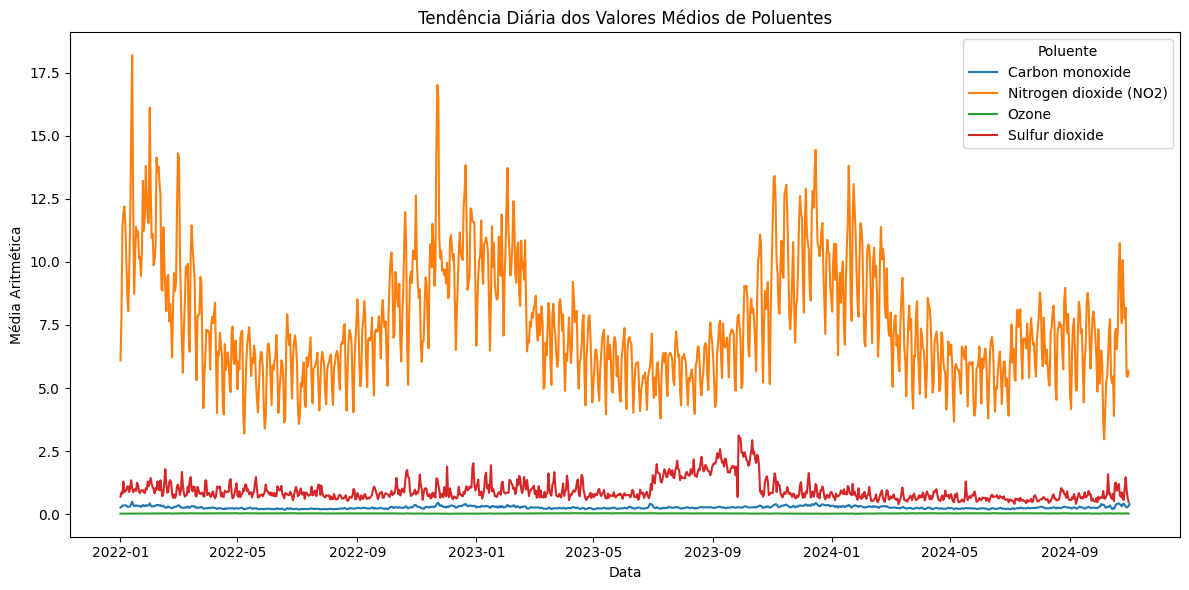

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=aq_ts, x='Date Local', y='Arithmetic Mean', hue='Parameter Name')
plt.title('Tendência Diária dos Valores Médios de Poluentes')
plt.xlabel('Data')
plt.ylabel('Média Aritmética')
plt.legend(title='Poluente')
plt.tight_layout()
plt.show()

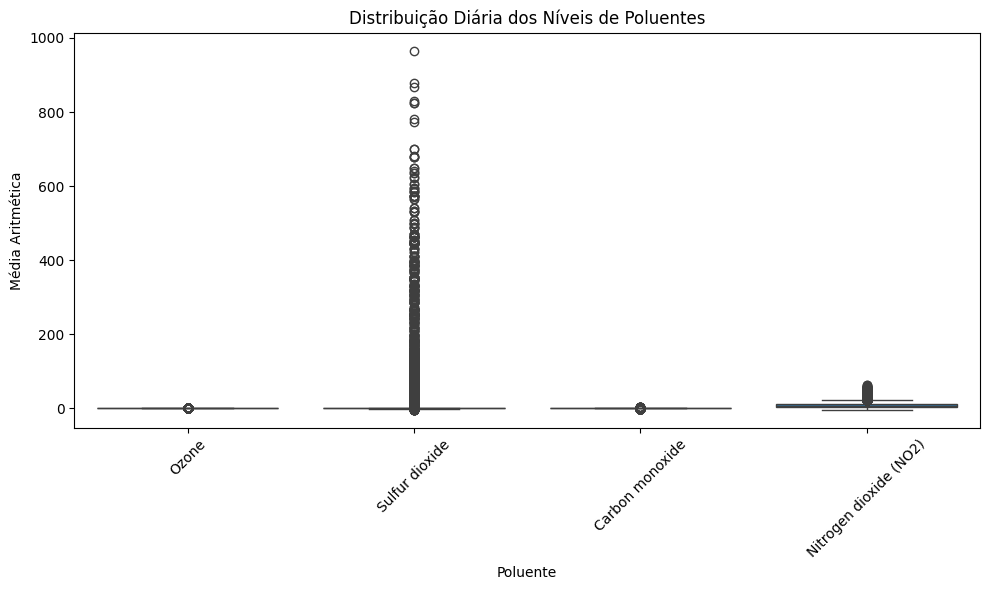

In [53]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_all, x='Parameter Name', y='Arithmetic Mean')
plt.title('Distribuição Diária dos Níveis de Poluentes')
plt.xlabel('Poluente')
plt.ylabel('Média Aritmética')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

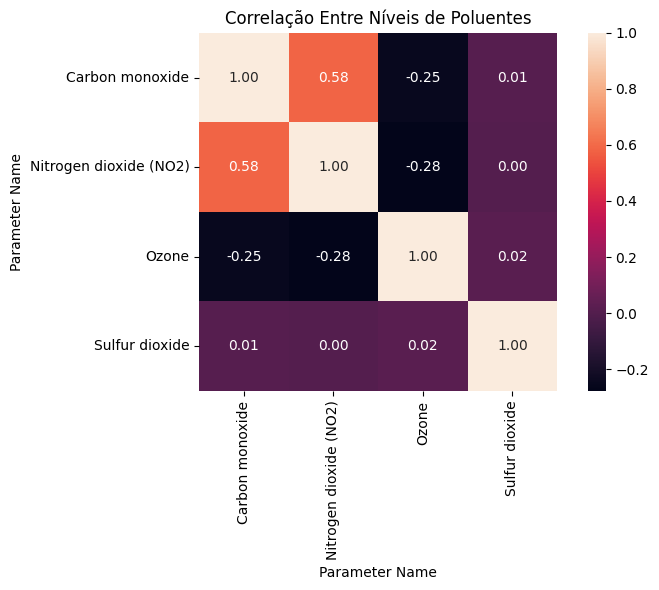

In [54]:
# === Célula 6: Matriz de correlação entre poluentes ===
# Pivot para ter colunas separadas de cada poluente
pivot = (
    df_all
    .pivot_table(
        index=['Date Local', 'State Name', 'County Name', 'City Name'],
        columns='Parameter Name',
        values='Arithmetic Mean',
        aggfunc='mean'
    )
    .reset_index()
)

# Calcula correlação
corr = pivot.drop(columns=['Date Local', 'State Name', 'County Name', 'City Name']).corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", square=True)
plt.title('Correlação Entre Níveis de Poluentes')
plt.tight_layout()
plt.show()

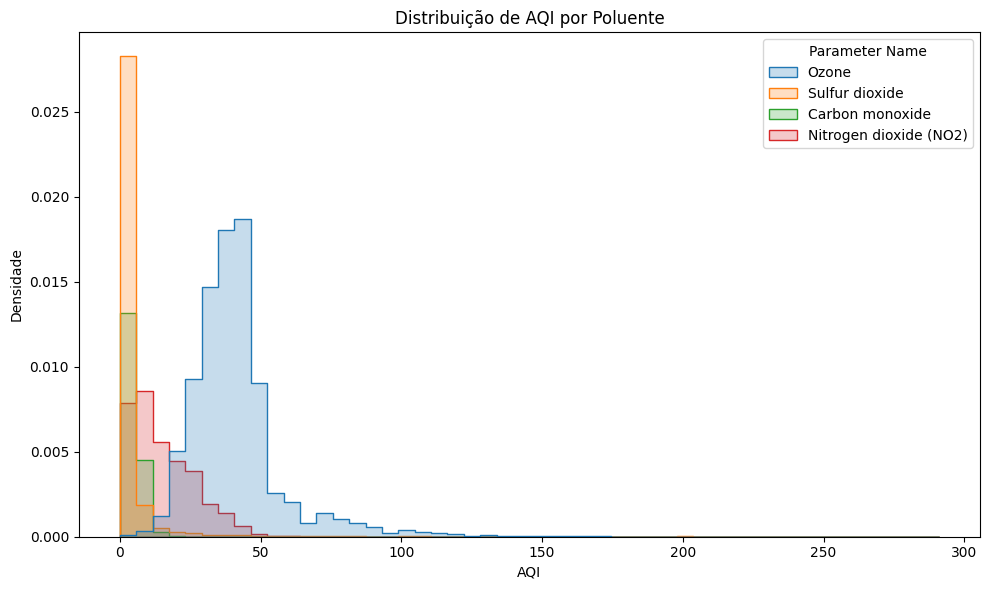

In [55]:
# === Célula 7: Distribuição de AQI por poluente ===
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df_all,
    x='AQI',
    hue='Parameter Name',
    bins=50,
    element='step',
    stat='density'
)
plt.title('Distribuição de AQI por Poluente')
plt.xlabel('AQI')
plt.ylabel('Densidade')
plt.tight_layout()
plt.show()

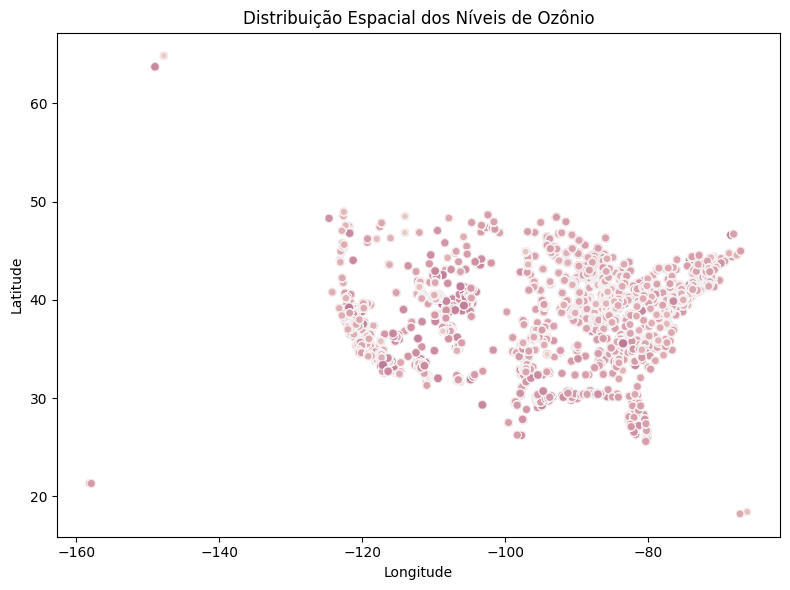

In [56]:
# === Célula 8: Exemplo de distribuição espacial (ex.: Ozônio) ===
ozone = df_all[df_all['Parameter Name'] == 'Ozone']

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=ozone,
    x='Longitude',
    y='Latitude',
    size='Arithmetic Mean',
    hue='Arithmetic Mean',
    alpha=0.6,
    legend=False
)
plt.title('Distribuição Espacial dos Níveis de Ozônio')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()


In [57]:
df_all['Parameter Name'].unique()

array(['Ozone', 'Sulfur dioxide', 'Carbon monoxide',
       'Nitrogen dioxide (NO2)'], dtype=object)

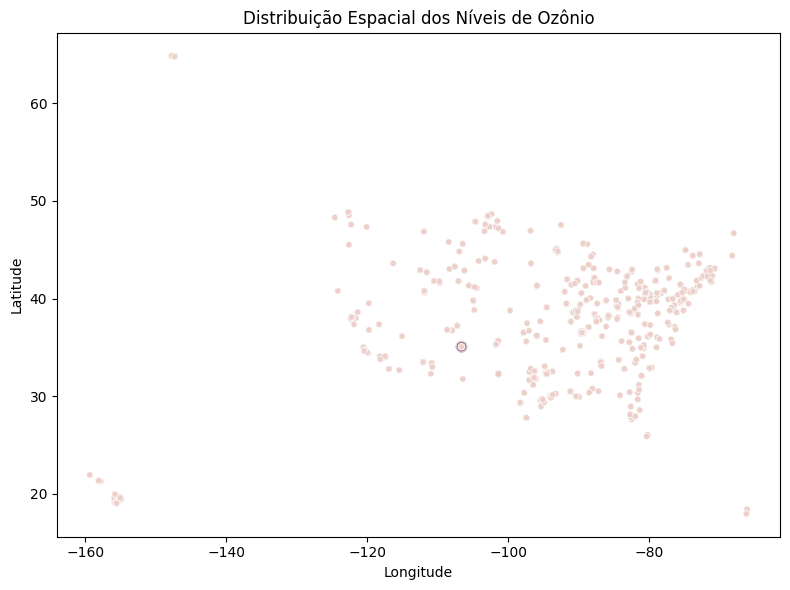

In [58]:
# === Célula 8: Exemplo de distribuição espacial (ex.: Ozônio) ===
ozone = df_all[df_all['Parameter Name'] == 'Sulfur dioxide']

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=ozone,
    x='Longitude',
    y='Latitude',
    size='Arithmetic Mean',
    hue='Arithmetic Mean',
    alpha=0.6,
    legend=False
)
plt.title('Distribuição Espacial dos Níveis de Ozônio')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()


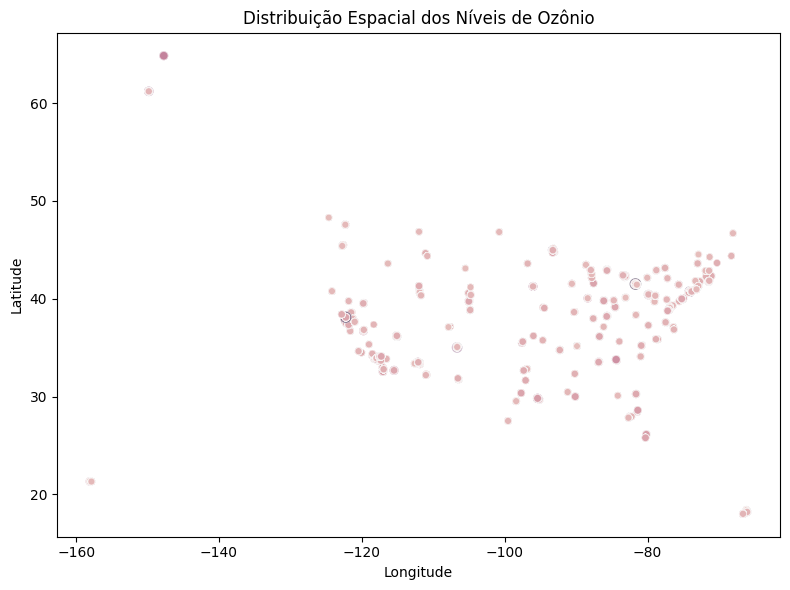

In [59]:
# === Célula 8: Exemplo de distribuição espacial (ex.: Ozônio) ===
ozone = df_all[df_all['Parameter Name'] == 'Carbon monoxide']

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=ozone,
    x='Longitude',
    y='Latitude',
    size='Arithmetic Mean',
    hue='Arithmetic Mean',
    alpha=0.6,
    legend=False
)
plt.title('Distribuição Espacial dos Níveis de Ozônio')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()


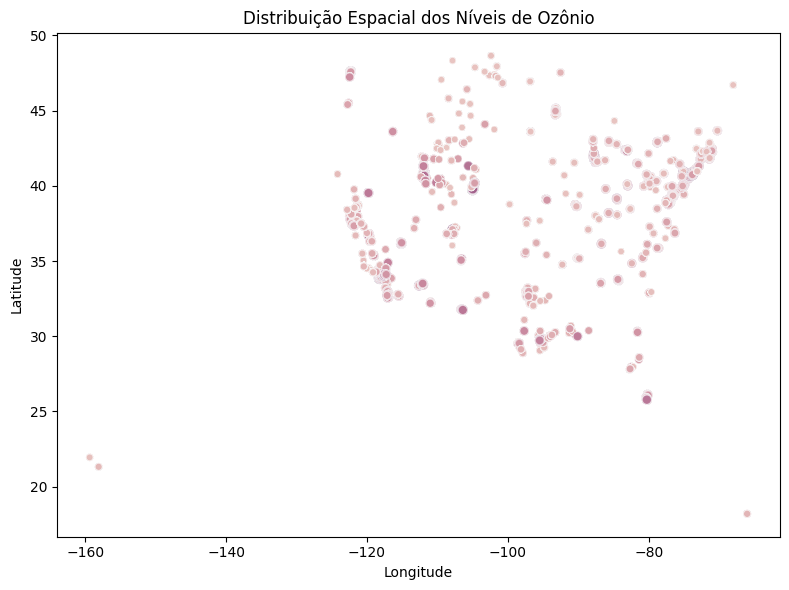

In [60]:
# === Célula 8: Exemplo de distribuição espacial (ex.: Ozônio) ===
ozone = df_all[df_all['Parameter Name'] == 'Nitrogen dioxide (NO2)']

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=ozone,
    x='Longitude',
    y='Latitude',
    size='Arithmetic Mean',
    hue='Arithmetic Mean',
    alpha=0.6,
    legend=False
)
plt.title('Distribuição Espacial dos Níveis de Ozônio')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()


In [61]:
# === Célula 9: Quais tipos de eventos existem e sua frequência ===
print("Tipos de Evento e Quantidade de Registros:")
display(df_all['Event Type'].value_counts().reset_index().rename(columns={'index':'Event Type','Event Type':'Count'}))

Tipos de Evento e Quantidade de Registros:


,Count,count
0,Included,64011
1,Excluded,867


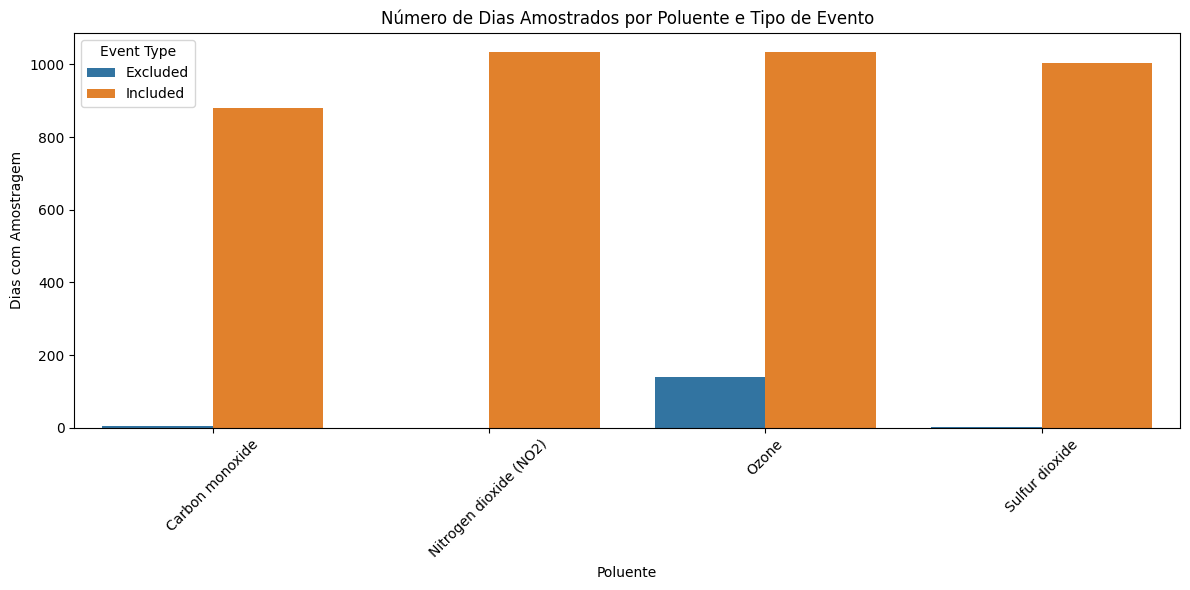

In [62]:
# === Célula 10: Contagem de dias por Poluente e Tipo de Evento ===
# Vamos ver quantos dias foram amostrados por combinação de Pollutant × Event Type
evt_counts = (
    df_all
    .groupby(['Parameter Name','Event Type'])['Date Local']
    .nunique()
    .reset_index(name='Days Sampled')
)
plt.figure(figsize=(12,6))
sns.barplot(data=evt_counts, x='Parameter Name', y='Days Sampled', hue='Event Type')
plt.title('Número de Dias Amostrados por Poluente e Tipo de Evento')
plt.xlabel('Poluente')
plt.ylabel('Dias com Amostragem')
plt.xticks(rotation=45)
plt.legend(title='Event Type')
plt.tight_layout()
plt.show()


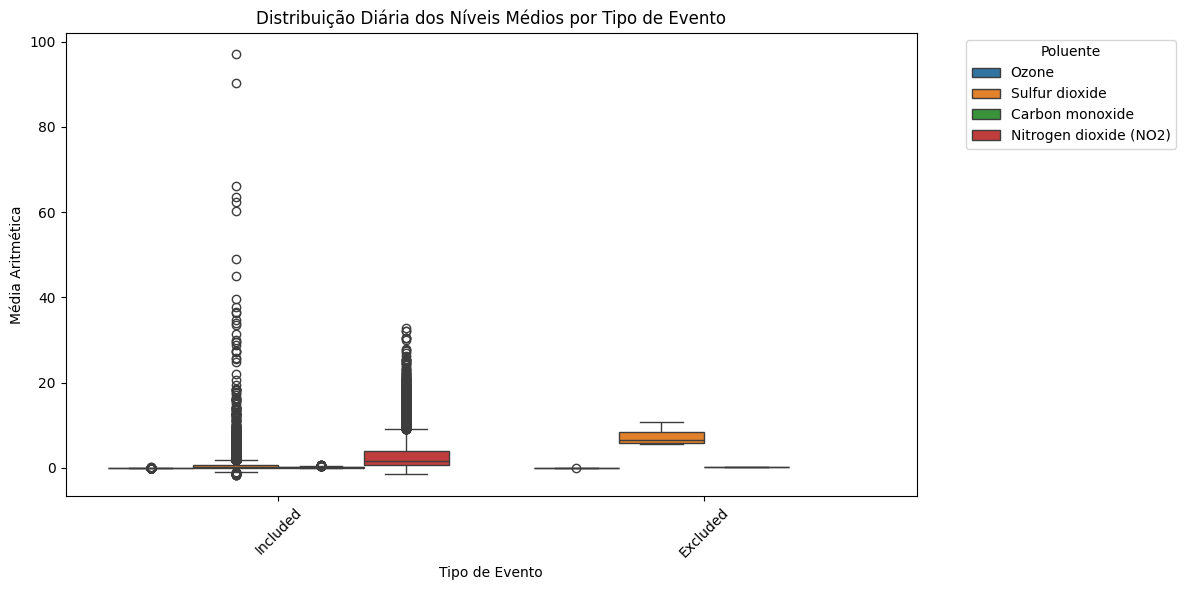

In [63]:
# === Célula 11: Distribuição de níveis (Arithmetic Mean) por Tipo de Evento ===
plt.figure(figsize=(12,6))
sns.boxplot(data=df_all, x='Event Type', y='Arithmetic Mean', hue='Parameter Name')
plt.title('Distribuição Diária dos Níveis Médios por Tipo de Evento')
plt.xlabel('Tipo de Evento')
plt.ylabel('Média Aritmética')
plt.xticks(rotation=45)
plt.legend(title='Poluente', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


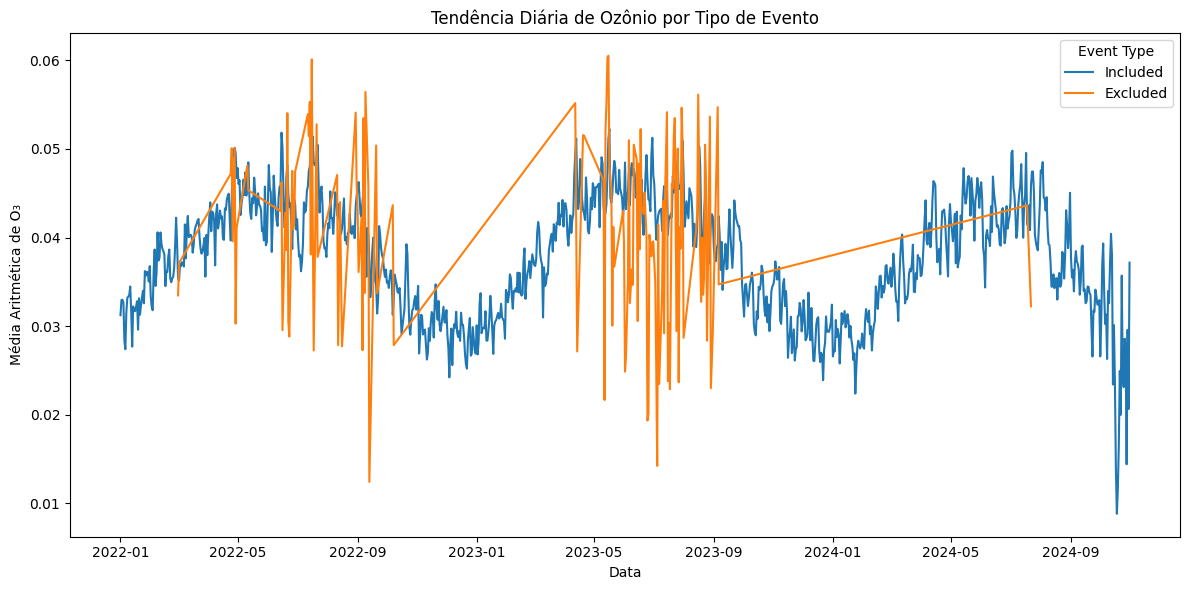

In [65]:
# === Célula 12: Tendência temporal segregada por Tipo de Evento (exemplo para Ozônio) ===
ozone = df_all[df_all['Parameter Name']=='Ozone']
oz_ts = (
    ozone
    .groupby(['Date Local','Event Type'])['Arithmetic Mean']
    .mean()
    .reset_index()
)
plt.figure(figsize=(12,6))
sns.lineplot(data=oz_ts, x='Date Local', y='Arithmetic Mean', hue='Event Type')
plt.title('Tendência Diária de Ozônio por Tipo de Evento')
plt.xlabel('Data')
plt.ylabel('Média Aritmética de O₃')
plt.legend(title='Event Type')
plt.tight_layout()
plt.show()


In [66]:
# === Célula 13: Estatísticas descritivas por Pollutant e Event Type ===
stats_evt = (
    df_all
    .groupby(['Parameter Name','Event Type'])['Arithmetic Mean']
    .agg(['count','mean','median','std'])
    .reset_index()
    .rename(columns={'count':'N','mean':'Mean','median':'Median','std':'StdDev'})
)
display(stats_evt)


,Parameter Name,Event Type,N,Mean,Median,StdDev
0,Carbon monoxide,Excluded,5,0.181829,0.200000,0.024949
1,Carbon monoxide,Included,5949,0.169351,0.154167,0.128226
2,Nitrogen dioxide (NO2),Included,12275,3.152109,1.652174,3.893909
3,Ozone,Excluded,858,0.040855,0.042647,0.013153
4,Ozone,Included,26428,0.039235,0.040529,0.012653
5,Sulfur dioxide,Excluded,4,7.458195,6.658055,2.400142
6,Sulfur dioxide,Included,19359,0.581709,0.175000,2.125074
